In [2]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
path = './data/raw_data_0304_160Mbps_5sec.cap0'
data = np.fromfile(path, dtype='int16')

In [4]:
data

array([   0,    0,  -81, ..., -392, -426, -422], dtype=int16)

In [5]:
data_num = len(data)
t_stemp = np.arange(data_num)/1e7

end_time = 5
fs = data_num/end_time

T = 1/fs



print('number of data :', data_num)
print("time_stemp :", t_stemp)
print("Sampling Frequency :", fs)

data_fft = np.fft.fft(data)
amplitude = abs(data_fft)*(2/len(data_fft))
frequency = np.fft.fftfreq(len(data_fft), T)

number of data : 50103518
time_stemp : [0.0000000e+00 1.0000000e-07 2.0000000e-07 ... 5.0103515e+00 5.0103516e+00
 5.0103517e+00]
Sampling Frequency : 10020703.6


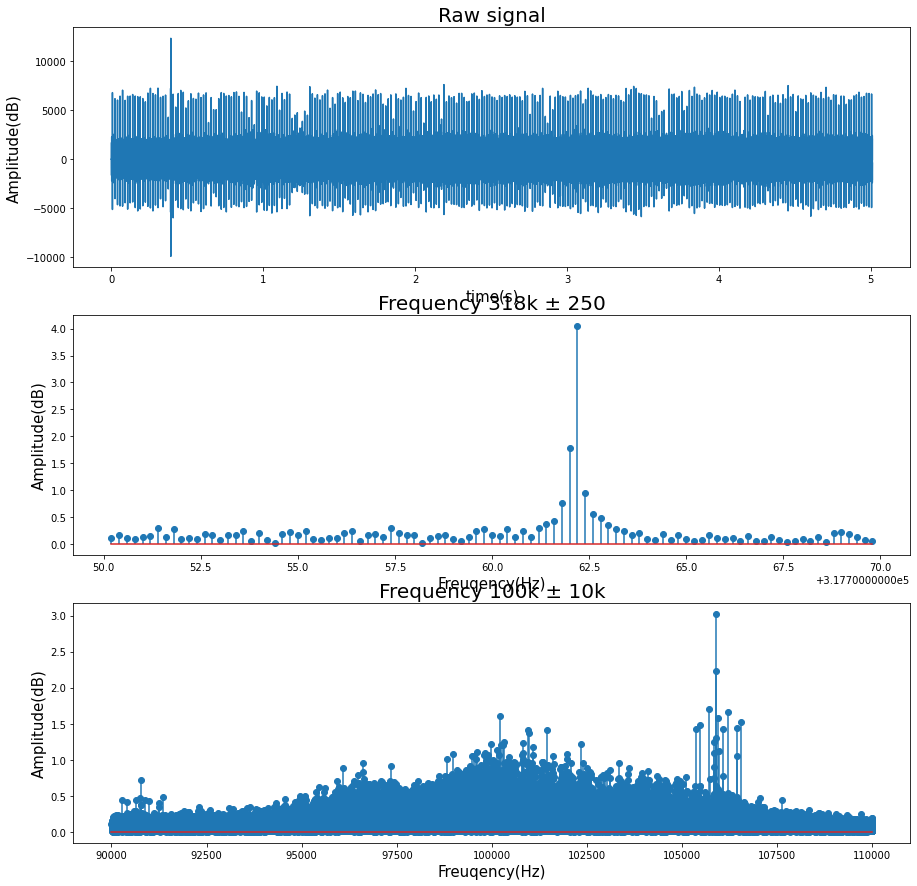

In [6]:
f_318k = frequency[(frequency>317750) & (frequency<317770)]
a_318k = amplitude[(frequency>317750) & (frequency<317770)]

f_100k = frequency[(frequency>100e3-10e3) & (frequency<100e3+10e3)]
a_100k = amplitude[(frequency>100e3-10e3) & (frequency<100e3+10e3)]

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
axes[0].plot(t_stemp, data)
axes[0].set_title("Raw signal", fontsize=20)
axes[0].set_xlabel("time(s)", fontsize=15)
axes[0].set_ylabel("Amplitude(dB)", fontsize=15)

axes[1].stem(f_318k, a_318k)
axes[1].set_title("Frequency 318k ± 250", fontsize=20)
axes[1].set_xlabel("Freuqency(Hz)", fontsize=15)
axes[1].set_ylabel("Amplitude(dB)", fontsize=15)


axes[2].stem(f_100k, a_100k)
axes[2].set_title("Frequency 100k ± 10k", fontsize=20)
axes[2].set_xlabel("Freuqency(Hz)", fontsize=15)
axes[2].set_ylabel("Amplitude(dB)", fontsize=15)

plt.show()

In [7]:
# Pass filter
from scipy.signal import butter, lfilter    

<StemContainer object of 3 artists>

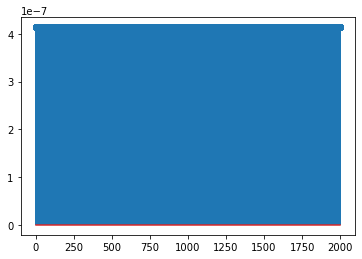

In [10]:
from scipy import signal

order = 10
lowcut = 317750
highcut = 317770

sos = signal.butter(order, [lowcut, highcut], 'band', fs=fs, output='sos')

# BPF
filtered = signal.sosfilt(sos, data)
filtered_fft = np.fft.fft(filtered) / len(filtered)
filtered_fft_abs = abs(filtered_fft)

plt.figure()



<StemContainer object of 3 artists>

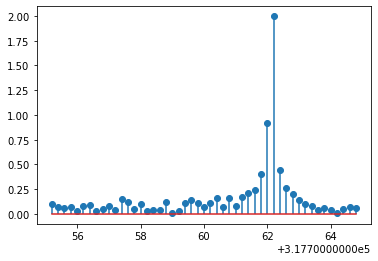

In [19]:
plt.stem(frequency[(frequency>317755) & (frequency<317765)], filtered_fft_abs[(frequency>317755) & (frequency<317765)])

<StemContainer object of 3 artists>

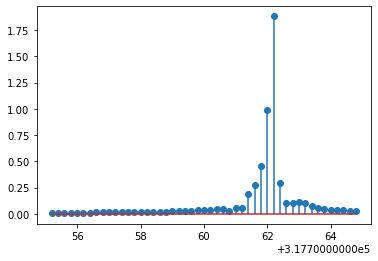

In [22]:
order = 5
lowcut = 317761
highcut = 317763

sos = signal.butter(order, [lowcut, highcut], 'band', fs=fs, output='sos')

filtered = signal.sosfilt(sos, data)

#plt.plot(t_stemp[:100], filtered[:100], 'g', label='filtered_data')

filtered_fft = np.fft.fft(filtered) / len(filtered)
filtered_fft_abs = abs(filtered_fft)
plt.stem(frequency[(frequency>317755) & (frequency<317765)], filtered_fft_abs[(frequency>317755) & (frequency<317765)])


In [ ]:
plt.plot(t_stemp[:10000], data[:10000], 'y', label='origin', alpha=0.5)
#plt.plot(t_stemp[:100], filtered[:100], 'g', label='filtered_data')
plt.legend()
plt.grid(True)
plt.show